REF https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

In [52]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf

In [53]:
# Set a random seed for reproducibility

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
# Load the datase
df1 = pd.read_csv('./algea.csv')

df= df1.drop(['Nitrate', 'Temperature', 'pH', 'CO2'], axis=1)

df.head()

,Light,Iron,Phosphate,Population
0,1011.00,0.17,0.08,4736.51
1,1206.50,0.14,0.04,4677.34
2,1450.63,0.04,0.02,3388.85
3,1158.40,0.09,0.06,4899.17
4,1159.92,0.15,0.08,4974.25


## Decision Tree

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

In [56]:

# Split the data into features and target variable
#X = df.drop('Population', axis=1)
X = df[['Light']]
y = df['Population']


# Initialize separate scalers for X and y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Standardize the features
X = scaler_X.fit_transform(X)

# Reshape y before standardizing
y = y.values.reshape(-1, 1)  
y = scaler_y.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Make predictions
y_pred = model.predict(X_test)

# Transform predictions back to original scale
y_test_original = scaler_y.inverse_transform(y_test) 
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Compute Evaluation Metrics
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")



Mean Squared Error (MSE): 150479.3360
Root Mean Squared Error (RMSE): 387.9167
Mean Absolute Error (MAE): 316.1951
R-squared (R²) Score: 0.9305


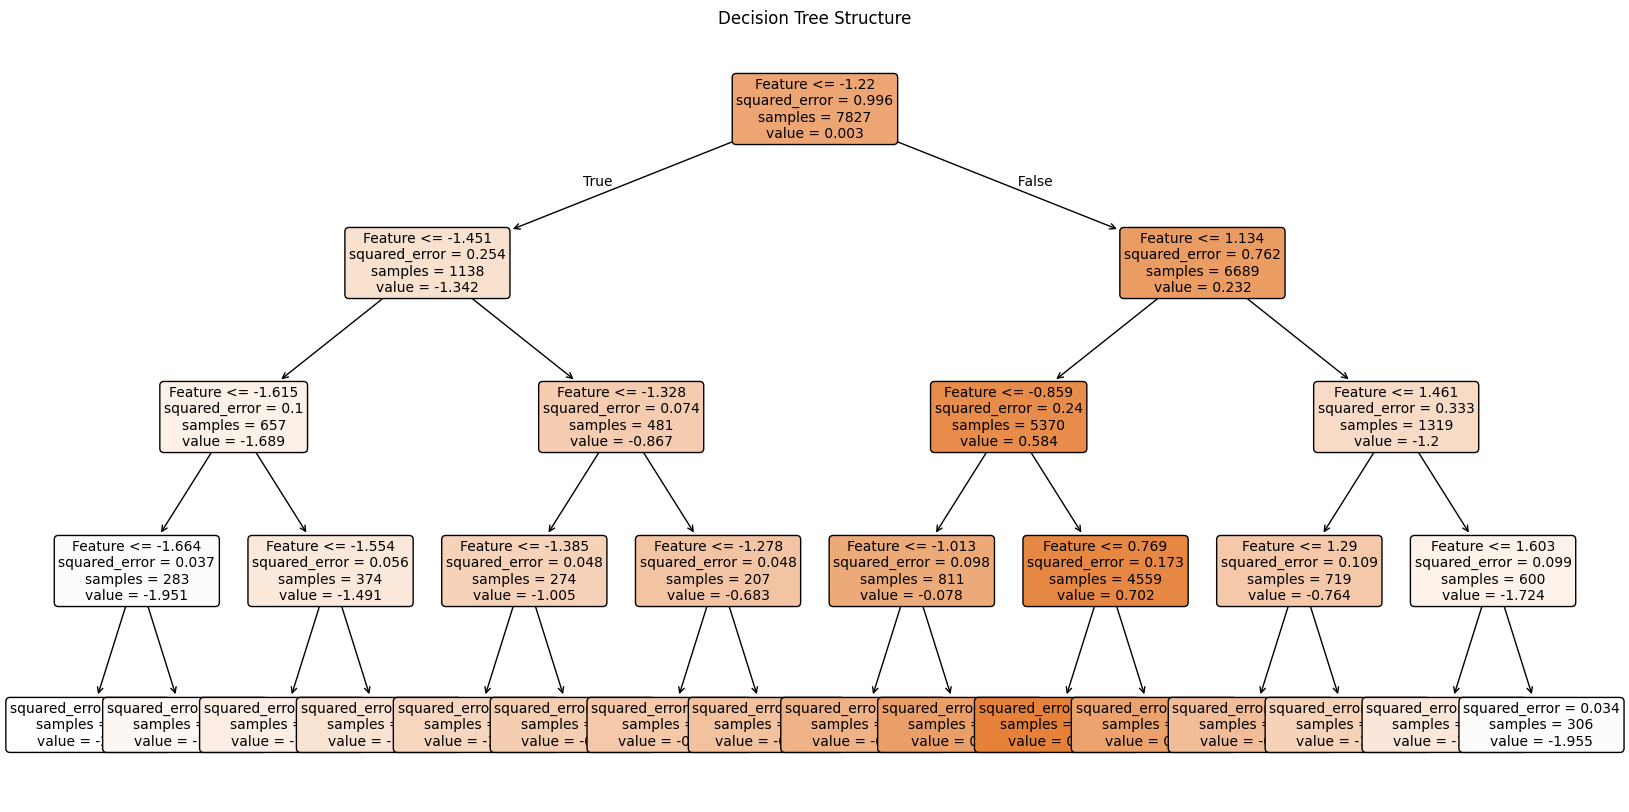

In [58]:
from sklearn.tree import plot_tree

# Visualizing decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=["Feature"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()